# Download data Loan Prediction from Analytics Vidhya

### Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Train Model

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
loan = pd.read_csv("train_ctrUa4K.csv")

In [10]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
loan1 = loan.copy()

In [13]:
loan1["Dependents"].mode()

0    0
dtype: object

In [14]:
loan1["Dependents"] = loan1["Dependents"].fillna(0)

In [15]:
loan1["Gender"] = loan1["Gender"].fillna('Male')

In [16]:
loan1["Married"].mode()

0    Yes
dtype: object

In [17]:
loan1["Married"] =  loan1["Married"].fillna('Yes')

In [18]:
loan1["Self_Employed"].mode()

0    No
dtype: object

In [19]:
loan1["Self_Employed"] = loan1["Self_Employed"].fillna('No')

In [20]:
loan1["LoanAmount"].mean()

146.41216216216216

In [21]:
loan1["LoanAmount"] = loan1["LoanAmount"].fillna(loan1["LoanAmount"].mean())

In [22]:
loan1["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [23]:
loan1["Loan_Amount_Term"].mode()

0    360.0
dtype: float64

In [24]:
loan1["Loan_Amount_Term"] = loan1["Loan_Amount_Term"].fillna(360)

In [25]:
loan1["Credit_History"].unique()

array([ 1.,  0., nan])

In [26]:
loan1["Credit_History"].mode()

0    1.0
dtype: float64

In [27]:
loan1["Credit_History"] = loan1["Credit_History"].fillna(1)

In [28]:
loan1["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [29]:
loan1["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [30]:
from sklearn import preprocessing
l=["Gender","Married","Education","Self_Employed",]
for i in l:
    le = preprocessing.LabelEncoder()
    le.fit(loan1[i])
    loan1[i]= le.transform(loan1[i])
    

In [31]:
loan1 = pd.get_dummies(loan1, columns=['Dependents', 'Property_Area'])

In [32]:
loan1.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,146.412162,360.0,1.0,Y,0,1,0,0,0,0,0,1
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,N,0,0,1,0,0,1,0,0
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,0,0,0,0,1
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,0,0,0,0,1
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1.0,Y,0,1,0,0,0,0,0,1


In [69]:
corr=loan1.corr()
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.007208,-0.145082,-0.004466,0.129953,0.096319,0.080283,-0.108623,0.034530
Married,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.026676,-0.353905,0.113853,0.249547,0.132566,-0.006805,0.005845,0.000546
Education,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,0.018553,-0.042065,-0.013355,0.020822,0.055288,0.077520,-0.039410,-0.034279
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.000101,-0.087571,0.082044,0.032434,0.003278,0.022065,0.008710,-0.030338
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.005596,-0.090174,0.040861,-0.034650,0.156687,0.015829,-0.014246,-0.000598
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,-0.029503,0.000949,-0.029769,0.010016,0.041491,0.005329,-0.027044,0.022776
LoanAmount,0.107930,0.147141,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.029444,-0.137437,0.062359,0.019547,0.153200,0.043178,-0.008273,-0.033220
Loan_Amount_Term,-0.074030,-0.100912,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,0.033405,0.106897,-0.088492,-0.010609,-0.077273,0.034321,0.059141,-0.094279
Credit_History,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,-0.084677,0.046697,0.009757,0.007987,-0.060473,-0.020906,0.035976,-0.016934
Dependents_0,-0.007208,0.026676,0.018553,-0.000101,-0.005596,-0.029503,-0.029444,0.033405,-0.084677,1.000000,-0.179211,-0.070631,-0.070216,-0.047628,-0.055084,0.006692,0.046370


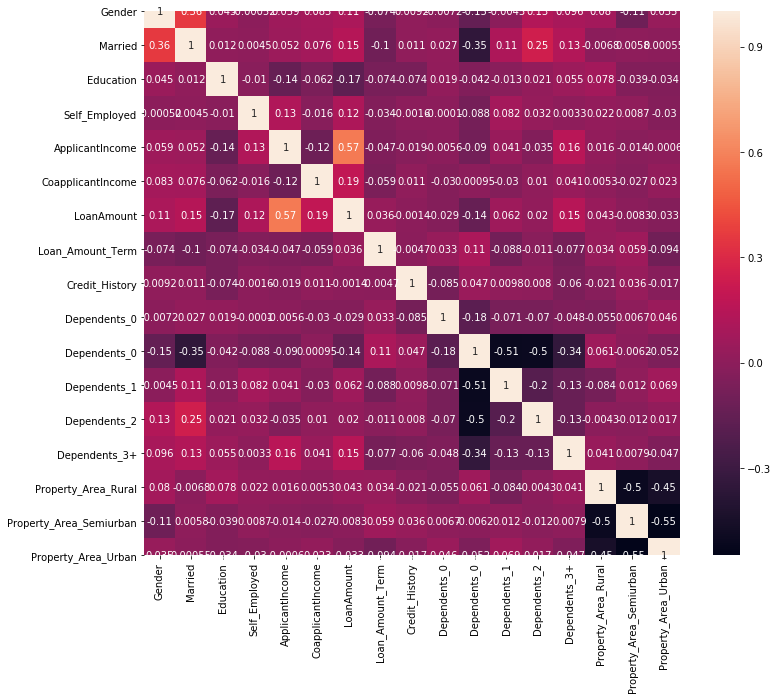

In [70]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

### Spliting Data

In [33]:
X = loan1.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = loan1['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80,test_size=0.20, random_state=67) 

### Fitting Model

### Naive bayes

In [35]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 


In [36]:
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred))

confusion matrix : 
 [[14 16]
 [ 8 85]]


In [37]:
print("Accuracy: \n",accuracy_score(y_test, y_pred))

Accuracy: 
 0.8048780487804879


In [38]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred1=mnb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred1))

confusion matrix : 
 [[12 18]
 [50 43]]


In [39]:
print("Accuracy: \n",accuracy_score(y_test, y_pred1))

Accuracy: 
 0.44715447154471544


In [40]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred2=bnb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred2))
print("Accuracy: \n",accuracy_score(y_test, y_pred2))

confusion matrix : 
 [[15 15]
 [ 3 90]]
Accuracy: 
 0.8536585365853658


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf= clf.fit(X_train, y_train)

In [42]:
y_pred3 = clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("confusion matrix : \n",confusion_matrix(y_test, y_pred3))
print("Accuracy: \n",accuracy_score(y_test, y_pred3))

confusion matrix : 
 [[19 11]
 [13 80]]
Accuracy: 
 0.8048780487804879


### test data

In [44]:
loan2 = pd.read_csv('test_lAUu6dG.csv')

In [45]:
loan2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [46]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [47]:
loan2["Gender"].mode()

0    Male
dtype: object

In [48]:
loan2["Gender"] = loan2["Gender"].fillna('Male')

In [49]:
loan2["Dependents"].mode()

0    0
dtype: object

In [50]:
loan2["Dependents"] = loan2["Dependents"].fillna(0)

In [51]:
loan2["Self_Employed"].mode()

0    No
dtype: object

In [52]:
loan2["Self_Employed"] = loan2["Self_Employed"].fillna('No')

In [53]:
loan2["LoanAmount"].mean()

136.13259668508286

In [54]:
loan2["LoanAmount"] = loan2["LoanAmount"].fillna(136.13259668508286)

In [55]:
loan1["Loan_Amount_Term"].mode()

0    360.0
dtype: float64

In [56]:
loan2["Loan_Amount_Term"] = loan2["Loan_Amount_Term"].fillna(360)

In [57]:
loan2["Credit_History"].mode()

0    1.0
dtype: float64

In [58]:
loan2["Credit_History"] = loan2["Credit_History"].fillna(1)

In [59]:
from sklearn import preprocessing
l=["Gender","Married","Education","Self_Employed",]
for i in l:
    le = preprocessing.LabelEncoder()
    le.fit(loan2[i])
    loan2[i]= le.transform(loan2[i])

In [60]:
loan2 = pd.get_dummies(loan2, columns=['Dependents', 'Property_Area'])

In [61]:
loan2.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,0,0,5720,0,110.0,360.0,1.0,0,1,0,0,0,0,0,1
1,LP001022,1,1,0,0,3076,1500,126.0,360.0,1.0,0,0,1,0,0,0,0,1
2,LP001031,1,1,0,0,5000,1800,208.0,360.0,1.0,0,0,0,1,0,0,0,1
3,LP001035,1,1,0,0,2340,2546,100.0,360.0,1.0,0,0,0,1,0,0,0,1
4,LP001051,1,0,1,0,3276,0,78.0,360.0,1.0,0,1,0,0,0,0,0,1


In [62]:
X1 = loan2.drop('Loan_ID', axis=1)

In [64]:
from sklearn.ensemble import VotingClassifier
voting_clf_S = VotingClassifier(estimators=[('GNB', gnb), ('MNB', mnb), ('DT', clf),('BNB', bnb)], voting='hard')
voting_clf_S.fit(X_train, y_train)

VotingClassifier(estimators=[('GNB', GaussianNB()), ('MNB', MultinomialNB()),
                             ('DT', DecisionTreeClassifier()),
                             ('BNB', BernoulliNB())])

In [65]:
y_pred7 =voting_clf_S.predict(X1) 

In [66]:
Loan_prediction = pd.read_csv('test_lAUu6dG.csv')

Loan_ID = Loan_prediction['Loan_ID']

In [67]:
submission=pd.DataFrame({'Loan_ID':Loan_ID, 'Loan_Status':y_pred7})
submission.to_csv("Loan Prediction.csv",index=False)